In [1]:
%load_ext autoreload
%autoreload 2

%load_ext line_profiler

In [2]:
import pandas as pd
import numpy as np

import  matplotlib.pyplot as plt
import pickle

from chemistry import Molecule
from util import score
from pprint import pprint

In [3]:
with open('../data/molecules_enh.pickle', 'rb') as f:
    molecules = pickle.load(f)

In [4]:
structures = pd.read_feather('../data/structures_enh.feather')
molecules_df = pd.read_feather('../data/molecules.feather')
labelled = pd.read_feather('../data/train.feather')
unlabelled = pd.read_feather('../data/test.feather')

In [9]:
labelled_enh = labelled.merge(molecules_df, left_on='molecule_name', right_on='molecule_name')
unlabelled_enh = unlabelled.merge(molecules_df, left_on='molecule_name', right_on='molecule_name')

In [10]:
labelled_enh.columns

Index(['id', 'molecule_name', 'atom_index_0', 'atom_index_1', 'type',
       'scalar_coupling_constant', 'nC', 'nF', 'nH', 'nN', 'nO', 'nCNOF',
       'nCN', 'nOF', 'nAtoms'],
      dtype='object')

(array([8.5001e+04, 1.0000e+00, 7.0000e+00, 2.6800e+02, 1.5020e+03,
        9.6330e+03, 2.0885e+04, 9.7620e+03, 3.3540e+03, 3.6200e+02]),
 array([ 0. ,  2.6,  5.2,  7.8, 10.4, 13. , 15.6, 18.2, 20.8, 23.4, 26. ]),
 <a list of 10 Patch objects>)

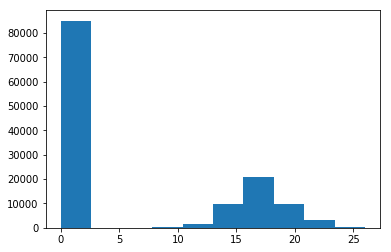

In [21]:
plt.hist(structures[structures.molecule_name.isin(labelled_enh[labelled_enh.type == '3JHN'].molecule_name)].groupby('molecule_name').count().atom)

In [48]:
m = molecules['dsgdb9nsd_000001']
m.positions.mean(axis=0)

array([-0.01268913,  1.0857966 ,  0.00800145], dtype=float32)